Submitted by: Salina Gurung

Problem 1: Classification using KNN from Scratch

1.1 Loading Dataset and EDA

The diabetes dataset is loaded using pandas. Basic exploratory analysis is performed to understand the dataset structure, data types, and presence of missing values.

In [ ]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/Ai/diabetes_.csv")

data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Problem 1.2 – Handle Missing Data
Missing values are checked and removed to ensure clean input data. This helps improve the reliability of distance calculations in KNN.

In [ ]:
data = data.dropna()

data.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Problem 1.3 – Feature Matrix, Target & Train-Test Split (70-30)
The dataset is divided into feature matrix X and target vector y. A custom train-test split function is used to split the data into 70% training and 30% testing sets.

In [ ]:
import numpy as np

X = data.drop(columns=["Outcome"]).values
y = data["Outcome"].values


In [ ]:
def train_test_split_scratch(X, y, test_size=0.3):
    np.random.seed(42)
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    split = int(len(X) * test_size)

    test_idx = indices[:split]
    train_idx = indices[split:]

    X_train = X[train_idx]
    X_test = X[test_idx]
    y_train = y[train_idx]
    y_test = y[test_idx]

    return X_train, X_test, y_train, y_test


In [ ]:
X_train, X_test, y_train, y_test = train_test_split_scratch(X, y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((538, 8), (230, 8), (538,), (230,))

Problem 1.4 – Implement KNN from Scratch
The KNN algorithm is implemented using Euclidean distance. For each test sample, the nearest k training samples are selected and the predicted class is determined using majority voting.

Euclidean Distance

In [ ]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))


Predict Single Point

In [ ]:
def knn_predict_single(query, X_train, y_train, k):
    distances = []

    for i in range(len(X_train)):
        dist = euclidean_distance(query, X_train[i])
        distances.append(dist)

    distances = np.array(distances)
    k_index = np.argsort(distances)[:k]
    k_labels = y_train[k_index]

    return np.bincount(k_labels).argmax()


Predict All Test Samples

In [ ]:
def knn_predict(X_test, X_train, y_train, k):
    predictions = []

    for i in range(len(X_test)):
        pred = knn_predict_single(X_test[i], X_train, y_train, k)
        predictions.append(pred)

    return np.array(predictions)


Problem 1.5 – Accuracy Calculation

In [ ]:
def compute_accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    return (correct / len(y_true)) * 100


In [ ]:
predictions = knn_predict(X_test, X_train, y_train, k=3)

accuracy = compute_accuracy(y_test, predictions)

accuracy


np.float64(67.3913043478261)

Problem 2 – Experimentation

Scaling the Feature Matrix

KNN is a distance-based algorithm. Feature scaling is applied so that all features contribute equally to distance calculation.

Min-Max Scaling (from scratch)

In [ ]:
def min_max_scale(X):
    X_scaled = np.zeros_like(X, dtype=float)

    for i in range(X.shape[1]):
        min_val = X[:, i].min()
        max_val = X[:, i].max()
        X_scaled[:, i] = (X[:, i] - min_val) / (max_val - min_val)

    return X_scaled


In [ ]:
X_scaled = min_max_scale(X)


Train-Test Split on Scaled Data

In [ ]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split_scratch(X_scaled, y)


KNN on Scaled Data

In [ ]:
pred_scaled = knn_predict(X_test_s, X_train_s, y_train_s, k=3)
scaled_accuracy = compute_accuracy(y_test_s, pred_scaled)

scaled_accuracy


np.float64(69.1304347826087)

Comparison Result

In [ ]:
print("Accuracy without scaling:", accuracy)
print("Accuracy with scaling:", scaled_accuracy)


Accuracy without scaling: 67.3913043478261
Accuracy with scaling: 69.1304347826087


Analysis

Feature scaling improves the distance calculation by preventing features with large values from dominating the result. This usually leads to better or more stable KNN performance.

Problem 3 – Experimentation with k Values

Varying k from 1 to 15

The effect of different k values is analyzed by measuring accuracy and time taken for prediction.

Experiment Function

In [ ]:
import time
import matplotlib.pyplot as plt

def experiment_k(X_train, y_train, X_test, y_test, k_values):
    acc_list = []
    time_list = []

    for k in k_values:
        start = time.time()
        preds = knn_predict(X_test, X_train, y_train, k)
        end = time.time()

        acc = compute_accuracy(y_test, preds)
        acc_list.append(acc)
        time_list.append(end - start)

    return acc_list, time_list


Run Experiment (Original Data)

In [ ]:
k_values = range(1, 16)

acc_original, time_original = experiment_k(
    X_train, y_train, X_test, y_test, k_values
)


Run Experiment (Scaled Data)

In [ ]:
acc_scaled, time_scaled = experiment_k(
    X_train_s, y_train_s, X_test_s, y_test_s, k_values
)


Visualization – k vs Accuracy

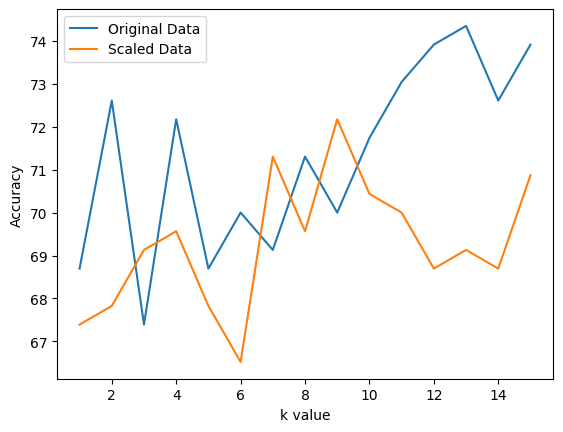

In [ ]:
plt.figure()
plt.plot(k_values, acc_original, label="Original Data")
plt.plot(k_values, acc_scaled, label="Scaled Data")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Visualization – k vs Time Taken

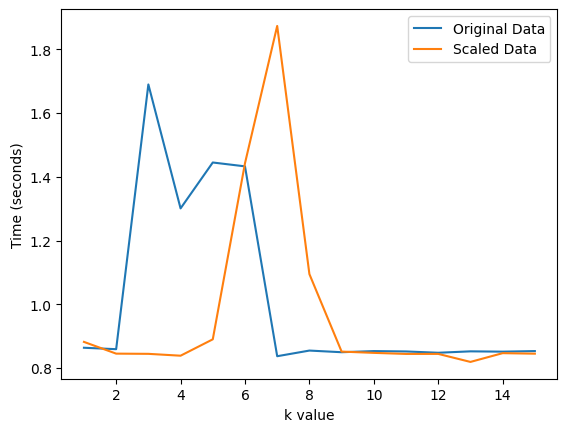

In [ ]:
plt.figure()
plt.plot(k_values, time_original, label="Original Data")
plt.plot(k_values, time_scaled, label="Scaled Data")
plt.xlabel("k value")
plt.ylabel("Time (seconds)")
plt.legend()
plt.show()


Final Analysis

Small k values are sensitive to noise and may overfit.

Larger k values are more stable but increase computation time.

Scaled data generally provides better accuracy due to fair distance measurement.

An optimal k is chosen where accuracy is high and time cost is reasonable.

Problem 4 – Additional Questions


Challenges of using KNN for large and high-dimensional datasets

KNN becomes computationally expensive for large datasets because it calculates the distance between the query point and all training samples. In high-dimensional data, distance measures become less meaningful, which can reduce classification performance.

Strategies to improve the efficiency of KNN

Efficiency can be improved by using dimensionality reduction techniques such as PCA to reduce feature space. Approximate nearest neighbor methods and efficient data structures like KD-Trees can also reduce computation time.